## 1. INSTALL/IMPORT LIBRARIES

In [1]:
# Install Fred API library
%pip install fredapi > /dev/null

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Import FRED
from fredapi import Fred

# Set FRED API key
from config import FREDKEY as fk
print(f"Your fred API key is: {fk}")



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Your fred API key is: 592e1401c1b3dd13827a914e77312c39


In [66]:
# Set matplotlib style
plt.style.use("fivethirtyeight")
palette = plt.rcParams["axes.prop_cycle"].by_key()["color"]

# Set a dark sns style:
styledic = {'figure.facecolor': 'gainsboro',
 'axes.labelcolor': '1',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'butt',
 'patch.edgecolor': 'b',
 'patch.force_edgecolor': True,
 'image.cmap': 'flare',
 'xtick.top': True,
 'ytick.right': False,
 'axes.grid': True,
 'axes.facecolor': '#d6d6f9',
 'axes.edgecolor': 'white',
 'grid.color': 'white',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': True,
 'ytick.left': True}

sns.set_theme(style=styledic)
sns.set_context("notebook")
sns.set_palette("bright")


# Det Plotly style:
px.defaults.template = "ggplot2"
px.defaults.color_continuous_scale = px.colors.sequential.Viridis


## 2. CREATE FRED OBJECT

In [2]:
fred = Fred(api_key=fk)

## 3. UNEMPLOYMENT DATA

### 3.1. Search & pull data

In [3]:
# Search and pull results for "unemployment"
unemp_search = fred.search("unemployment", order_by="popularity", sort_order="desc")

# Check it out
print(f"Dataframe shape: {unemp_search.shape}")
unemp_search.head(3)

Dataframe shape: (1000, 15)


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CPIAUCSL,CPIAUCSL,2024-04-08,2024-04-08,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2024-02-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2024-03-12 07:42:02-05:00,95,The Consumer Price Index for All Urban Consume...
UNRATE,UNRATE,2024-04-08,2024-04-08,Unemployment Rate,1948-01-01,2024-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-04-05 07:50:02-05:00,95,The unemployment rate represents the number of...
PAYEMS,PAYEMS,2024-04-08,2024-04-08,"All Employees, Total Nonfarm",1939-01-01,2024-03-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-04-05 07:52:01-05:00,83,"All Employees: Total Nonfarm, commonly known a..."


In [42]:
# Get the unemplyment rate series
dfunemp = fred.get_series(series_id="UNRATE")
# Print series
print("\nUSA unemployment % (monthly, since 1948):\n")
print(dfunemp)



USA unemployment % (monthly, since 1948):

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-11-01    3.7
2023-12-01    3.7
2024-01-01    3.7
2024-02-01    3.9
2024-03-01    3.8
Length: 915, dtype: float64


In [7]:
# Search and pull results for unemployment rate by state
unemp_search_df = fred.search("unemployment rate state", filter= ("frequency", "Monthly"))

# Check indesxes
print(f"\nResults for 'unemployment rate state':\n")
print(unemp_search_df.index)



Results for 'unemployment rate state':

Index(['UNRATE', 'UNRATENSA', 'LNS14000006', 'UNEMPLOY', 'LNU04000006',
       'U6RATE', 'CAUR', 'U6RATENSA', 'CAURN', 'TXUR',
       ...
       'FLOKAL7URN', 'CASTAN7URN', 'CTHART3URN', 'VASMYT3URN', 'AUBU201UR',
       'LNU04032220', 'SCMARI7URN', 'VAALBE7URN', 'HAGE124UR', 'MIINGH5URN'],
      dtype='object', name='series id', length=1000)

 Filtered by 'seasonally adjusted':

Index(['UNRATE', 'LNS14000006', 'U6RATE', 'CAUR', 'TXUR', 'M0892AUSM156SNBR',
       'LNS14000024', 'LNS14000031', 'M0892BUSM156SNBR', 'NYUR',
       ...
       'LBSSA46', 'LNS14000089', 'M08311USM156SNBR', 'LNS13008397', 'LBSSA20',
       'LNS14000150', 'NEIPTERM156SFRBRIC', 'LBSSA10', 'LBSSA44',
       'LRUN25TTUSM156S'],
      dtype='object', name='series id', length=161)


### 3.2. Fine tune search

In [43]:
# Query within that dataframe for the seasonally adjusted unemployment rate
print(f"\n Filtered by 'seasonally adjusted':\n")
unemp_df = unemp_search_df.query("seasonal_adjustment == 'Seasonally Adjusted' and units == 'Percent'")
print(unemp_df.index)


 Filtered by 'seasonally adjusted':

Index(['UNRATE', 'LNS14000006', 'U6RATE', 'CAUR', 'TXUR', 'M0892AUSM156SNBR',
       'LNS14000024', 'LNS14000031', 'M0892BUSM156SNBR', 'NYUR',
       ...
       'LBSSA46', 'LNS14000089', 'M08311USM156SNBR', 'LNS13008397', 'LBSSA20',
       'LNS14000150', 'NEIPTERM156SFRBRIC', 'LBSSA10', 'LBSSA44',
       'LRUN25TTUSM156S'],
      dtype='object', name='series id', length=161)


In [21]:
# Get only those with "Unemployment Rate" in the title
unemp_df = unemp_df.loc[unemp_df["title"].str.contains("Unemployment Rate")]
unemp_df = unemp_df[unemp_df.index.str.endswith("UR")]
print(unemp_df.index)

# Check titles
print(unemp_df.title)

Index(['CAUR', 'TXUR', 'NYUR', 'FLUR', 'PAUR', 'OHUR', 'MIUR', 'ALUR', 'MAUR',
       'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR', 'WIUR', 'VAUR', 'KYUR',
       'SCUR', 'NMUR', 'MNUR', 'TNUR', 'WAUR', 'MDUR', 'ORUR', 'WVUR', 'NVUR',
       'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR', 'PRUR', 'INUR', 'LAUR',
       'HIUR', 'NDUR', 'MTUR', 'DCUR', 'MSUR', 'MEUR', 'NEUR', 'CTUR', 'IDUR',
       'NHUR', 'RIUR', 'KSUR', 'WYUR', 'DEUR', 'VTUR', 'SDUR', 'CMWRUR',
       'CSOUUR', 'CNERUR', 'CWSTUR', 'CNEWUR'],
      dtype='object', name='series id')
series id
CAUR                       Unemployment Rate in California
TXUR                            Unemployment Rate in Texas
NYUR                         Unemployment Rate in New York
FLUR                          Unemployment Rate in Florida
PAUR                     Unemployment Rate in Pennsylvania
OHUR                             Unemployment Rate in Ohio
MIUR                         Unemployment Rate in Michigan
ALUR                 

### 3.3. Clean data

In [22]:
# Take the field 'title' for each item,
# query the FRED API for series corresponding to each index code,
# make each series into a dataframe and assign it the previously extracted 'title'.
# Append the results to a list,
# print lenght of list and one example.

all_res = []

for i in unemp_df.index:
    title = unemp_df.loc[i, "title"]
    result = fred.get_series(i)
    result = result.to_frame(name=title)
    all_res.append(result)

print(len(all_res))
all_res[1]

57


,Unemployment Rate in Texas
1976-01-01,5.8
1976-02-01,5.8
1976-03-01,5.9
1976-04-01,5.9
1976-05-01,5.9
...,...
2023-10-01,3.9
2023-11-01,3.9
2023-12-01,3.9
2024-01-01,3.9


In [27]:
# Concatenate all dataframes in the list into a single dataframe
concatdf = pd.concat(all_res, axis=1)

# Take out the 'unemployment rate in ' part of the column names
concatdf.rename(columns=lambda x: x.replace('Unemployment Rate in ', ''), inplace=True)

# Drop the columns referring to bigger-than-state areas and rename the dataframe to just "df"
dropcolumns = concatdf.columns[concatdf.columns.str.contains('Census')]
df = concatdf.drop(columns=dropcolumns)

# Check the resulting dataframe columns to see if they are all states
lista = df.columns.to_list()
print(len(lista))
print(lista)

52
['California', 'Texas', 'New York', 'Florida', 'Pennsylvania', 'Ohio', 'Michigan', 'Alabama', 'Massachusetts', 'North Carolina', 'Illinois', 'New Jersey', 'Georgia', 'Colorado', 'Arizona', 'Wisconsin', 'Virginia', 'Kentucky', 'South Carolina', 'New Mexico', 'Minnesota', 'Tennessee', 'Washington', 'Maryland', 'Oregon', 'West Virginia', 'Nevada', 'Arkansas', 'Oklahoma', 'Missouri', 'Alaska', 'Iowa', 'Utah', 'Puerto Rico', 'Indiana', 'Louisiana', 'Hawaii', 'North Dakota', 'Montana', 'the District of Columbia', 'Mississippi', 'Maine', 'Nebraska', 'Connecticut', 'Idaho', 'New Hampshire', 'Rhode Island', 'Kansas', 'Wyoming', 'Delaware', 'Vermont', 'South Dakota']


In [28]:
# Check whether there are na values
print(df.isna().sum(axis=0).all)

<bound method NDFrame._add_numeric_operations.<locals>.all of California                  0
Texas                       0
New York                    0
Florida                     0
Pennsylvania                0
Ohio                        0
Michigan                    0
Alabama                     0
Massachusetts               0
North Carolina              0
Illinois                    0
New Jersey                  0
Georgia                     0
Colorado                    0
Arizona                     0
Wisconsin                   0
Virginia                    0
Kentucky                    0
South Carolina              0
New Mexico                  0
Minnesota                   0
Tennessee                   0
Washington                  0
Maryland                    0
Oregon                      0
West Virginia               0
Nevada                      0
Arkansas                    0
Oklahoma                    0
Missouri                    0
Alaska                      0
Iowa    

In [29]:
# Check where the NA values are in Puerto Rico
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df["Puerto Rico"])

1976-01-01    19.6
1976-02-01    19.5
1976-03-01    19.3
1976-04-01    19.0
1976-05-01    18.9
1976-06-01    18.9
1976-07-01    19.1
1976-08-01    19.4
1976-09-01    19.8
1976-10-01    19.9
1976-11-01    19.8
1976-12-01    19.8
1977-01-01    19.8
1977-02-01    19.9
1977-03-01    20.2
1977-04-01    20.5
1977-05-01    20.7
1977-06-01    20.8
1977-07-01    20.6
1977-08-01    20.2
1977-09-01    19.7
1977-10-01    19.4
1977-11-01    19.2
1977-12-01    19.0
1978-01-01    18.7
1978-02-01    18.4
1978-03-01    18.0
1978-04-01    17.7
1978-05-01    17.4
1978-06-01    17.4
1978-07-01    17.5
1978-08-01    17.8
1978-09-01    18.1
1978-10-01    18.3
1978-11-01    18.4
1978-12-01    18.3
1979-01-01    18.0
1979-02-01    17.5
1979-03-01    17.1
1979-04-01    16.7
1979-05-01    16.4
1979-06-01    16.4
1979-07-01    16.5
1979-08-01    16.7
1979-09-01    17.0
1979-10-01    17.3
1979-11-01    17.5
1979-12-01    17.6
1980-01-01    17.5
1980-02-01    17.3
1980-03-01    17.1
1980-04-01    16.8
1980-05-01  

In [36]:
# Take the indexes of the rows with NA values in Puerto Rico
nulls = df.loc[df["Puerto Rico"].isnull()]
print(nulls.index)
listanulls = nulls.index.to_list() # Make them into a list
listanulls1 = []
for choclo in listanulls:
    x = str(choclo)
    print(x) # Check index string: it has time information (unnecessary)
    x = x[0:-9:] # Slice the string to remove time information
    print(x)
    listanulls1.append(x)
print(listanulls1)

DatetimeIndex(['2020-03-01', '2020-04-01'], dtype='datetime64[ns]', freq=None)
2020-03-01 00:00:00
2020-03-01
2020-04-01 00:00:00
2020-04-01
['2020-03-01', '2020-04-01']


In [37]:
# Imputation: fill NA values in Puerto Rico with 9.0, filling in the progression,
# then display the series to confirm
for date in listanulls1:
    df["Puerto Rico"].at[date] = 9.0

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df["Puerto Rico"])

1976-01-01    19.6
1976-02-01    19.5
1976-03-01    19.3
1976-04-01    19.0
1976-05-01    18.9
1976-06-01    18.9
1976-07-01    19.1
1976-08-01    19.4
1976-09-01    19.8
1976-10-01    19.9
1976-11-01    19.8
1976-12-01    19.8
1977-01-01    19.8
1977-02-01    19.9
1977-03-01    20.2
1977-04-01    20.5
1977-05-01    20.7
1977-06-01    20.8
1977-07-01    20.6
1977-08-01    20.2
1977-09-01    19.7
1977-10-01    19.4
1977-11-01    19.2
1977-12-01    19.0
1978-01-01    18.7
1978-02-01    18.4
1978-03-01    18.0
1978-04-01    17.7
1978-05-01    17.4
1978-06-01    17.4
1978-07-01    17.5
1978-08-01    17.8
1978-09-01    18.1
1978-10-01    18.3
1978-11-01    18.4
1978-12-01    18.3
1979-01-01    18.0
1979-02-01    17.5
1979-03-01    17.1
1979-04-01    16.7
1979-05-01    16.4
1979-06-01    16.4
1979-07-01    16.5
1979-08-01    16.7
1979-09-01    17.0
1979-10-01    17.3
1979-11-01    17.5
1979-12-01    17.6
1980-01-01    17.5
1980-02-01    17.3
1980-03-01    17.1
1980-04-01    16.8
1980-05-01  

<AxesSubplot:>

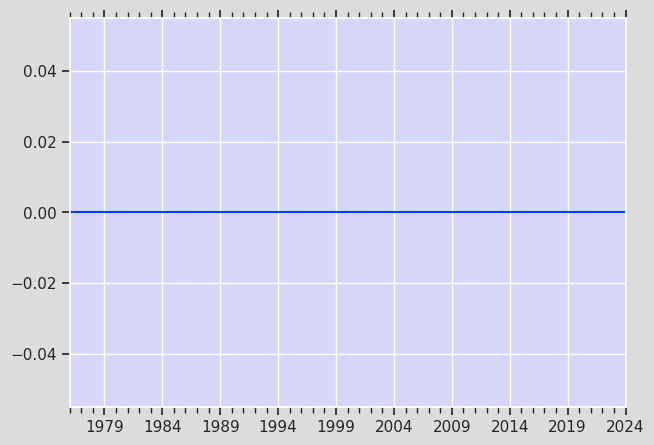

In [38]:
# Plot sum of isnull values along axis 1 to confirm that there are no more NA values
df.isnull().sum(axis=1).plot()

## 4. Plot data

In [44]:
# Print series
print("\nUSA unemployment % (monthly, since 1948):\n")
print(dfunemp)


USA unemployment % (monthly, since 1948):

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-11-01    3.7
2023-12-01    3.7
2024-01-01    3.7
2024-02-01    3.9
2024-03-01    3.8
Length: 915, dtype: float64


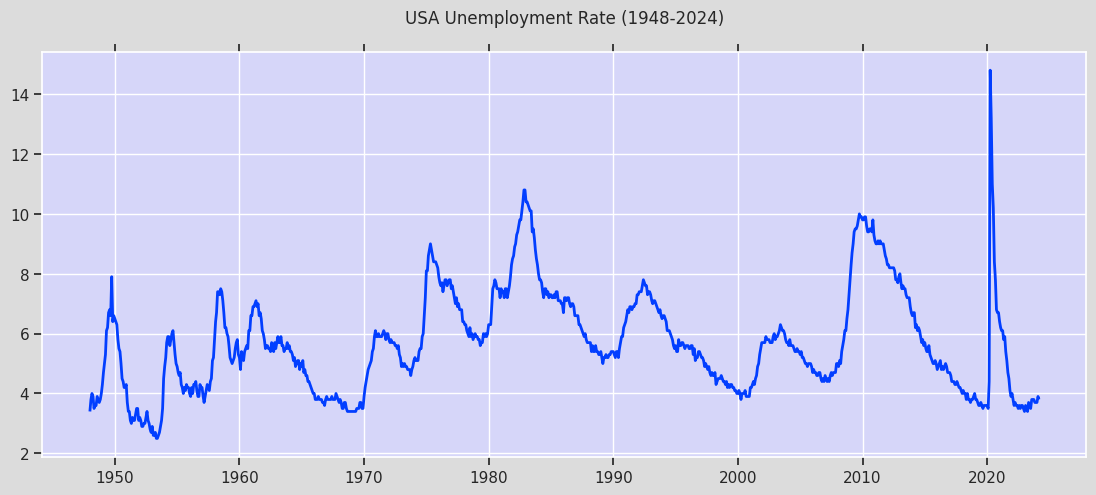

In [45]:
# Plot the unemployment rate in seaborn
plt.figure(figsize=(12, 5))
sns.lineplot(data=dfunemp, lw=2)
plt.title("USA Unemployment Rate (1948-2024)", x=0.5, y=1.05)
plt.show()

In [79]:
# Plot evolution of unemployment rate in Plotly
fig3 = px.line(df, title="Unemployment Rate by State (1976-2024)", labels={"value": "Unemployment Rate (%)", "variable": "State", "index": "Year"})
fig3.update_layout(paper_bgcolor='#DCDCDC')
fig3.update_layout(plot_bgcolor='#d6d6f9')
fig3.show()


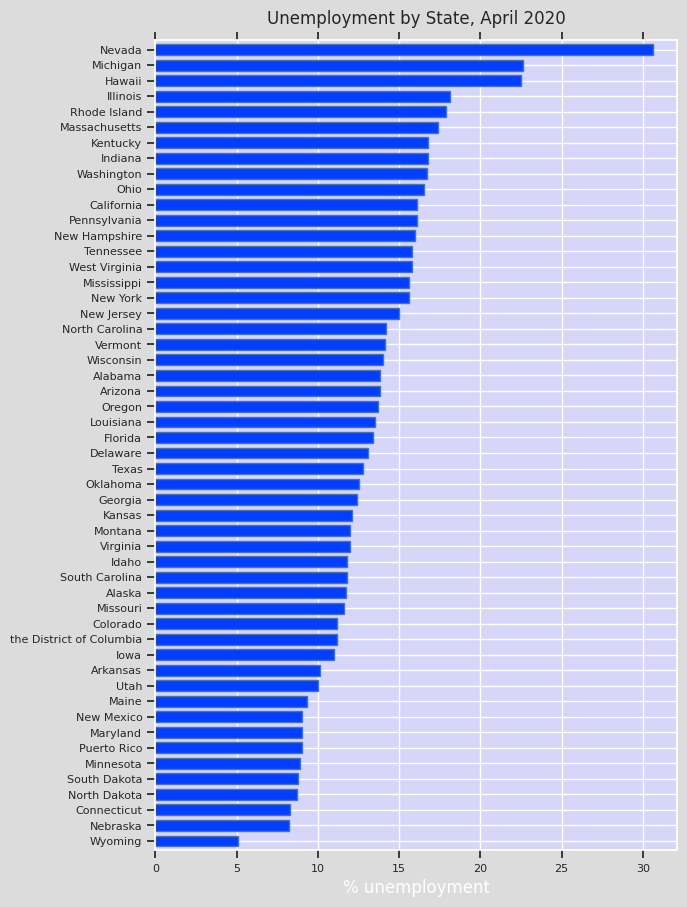

In [82]:
fig_april = df.loc[df.index == "2020-04-01"].T.sort_values("2020-04-01", ascending=True) \
    .plot(kind="barh", figsize=(6,10), width=0.7, fontsize=8)

fig_april.legend().remove()
fig_april.set_xlabel("% unemployment")
plt.title("Unemployment by State, April 2020", x=0.5, y=1.01)

plt.show()

In [157]:

# divide dataframe df in two, one with the first half of the states in alphabetical order, the other with the second half.
# plot the unemployment rate for each state in both march 2020 and april 2020 as a bar graph.
# show it in two subplots, side by side:
# one for the first half of the states, the other for the second half.

# Sort the columns alphabetically
df.sort_index(axis=1, inplace=True)


# Split df into four parts, with 12, 12, 13, and 13 states respectively:
df1 = df.iloc[:, :12]
df2 = df.iloc[:, 12:24]
df3 = df.iloc[:, 24:37]
df4 = df.iloc[:, 37:]


df4


,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,the District of Columbia
1976-01-01,8.0,19.6,7.8,7.4,3.3,6.0,5.8,5.8,8.6,6.1,8.5,7.5,5.8,4.1,8.7
1976-02-01,8.1,19.5,7.8,7.4,3.3,6.0,5.8,5.9,8.6,6.1,8.5,7.5,5.8,4.1,8.7
1976-03-01,8.1,19.3,7.7,7.3,3.2,6.0,5.9,5.8,8.6,6.1,8.4,7.5,5.7,4.1,8.6
1976-04-01,8.1,19.0,7.7,7.2,3.1,6.0,5.9,5.8,8.6,6.0,8.5,7.5,5.6,4.0,8.5
1976-05-01,8.1,18.9,7.7,7.0,3.1,5.9,5.9,5.7,8.5,5.9,8.5,7.4,5.5,3.9,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-01,3.4,5.6,3.4,3.0,2.1,3.5,3.9,2.8,2.3,3.0,4.4,4.3,3.4,2.9,4.9
2023-11-01,3.4,5.6,3.4,3.0,2.1,3.5,3.9,2.8,2.3,3.1,4.4,4.3,3.4,2.9,4.9
2023-12-01,3.4,5.7,3.4,3.0,2.1,3.4,3.9,2.8,2.3,3.0,4.4,4.3,3.4,2.9,4.9
2024-01-01,3.4,5.7,3.6,3.0,2.1,3.5,3.9,2.8,2.3,3.0,4.6,4.3,3.2,2.8,5.0


In [158]:
dif = (df.loc['2020-04-01'] - df.loc['2020-03-01'])/df.loc['2020-03-01']*100
dif.sort_values(inplace=True)

# round the values to 2 decimal places
dif = dif.round(2)

# Reorder alphabetically:
dif = dif.sort_index()

# Split the dif series in 12, 12, 13, 13:
dif1 = dif.iloc[:12]
dif2 = dif.iloc[12:24]
dif3 = dif.iloc[24:37]
dif4 = dif.iloc[37:]


dif4


Pennsylvania                228.57
Puerto Rico                   0.00
Rhode Island                383.78
South Carolina              280.65
South Dakota                266.67
Tennessee                   351.43
Texas                       156.00
Utah                        300.00
Vermont                     487.50
Virginia                    275.00
Washington                  221.15
West Virginia               192.59
Wisconsin                   366.67
Wyoming                       6.25
the District of Columbia     93.10
dtype: float64

KeyError: 'False: boolean label can not be used without a boolean index'

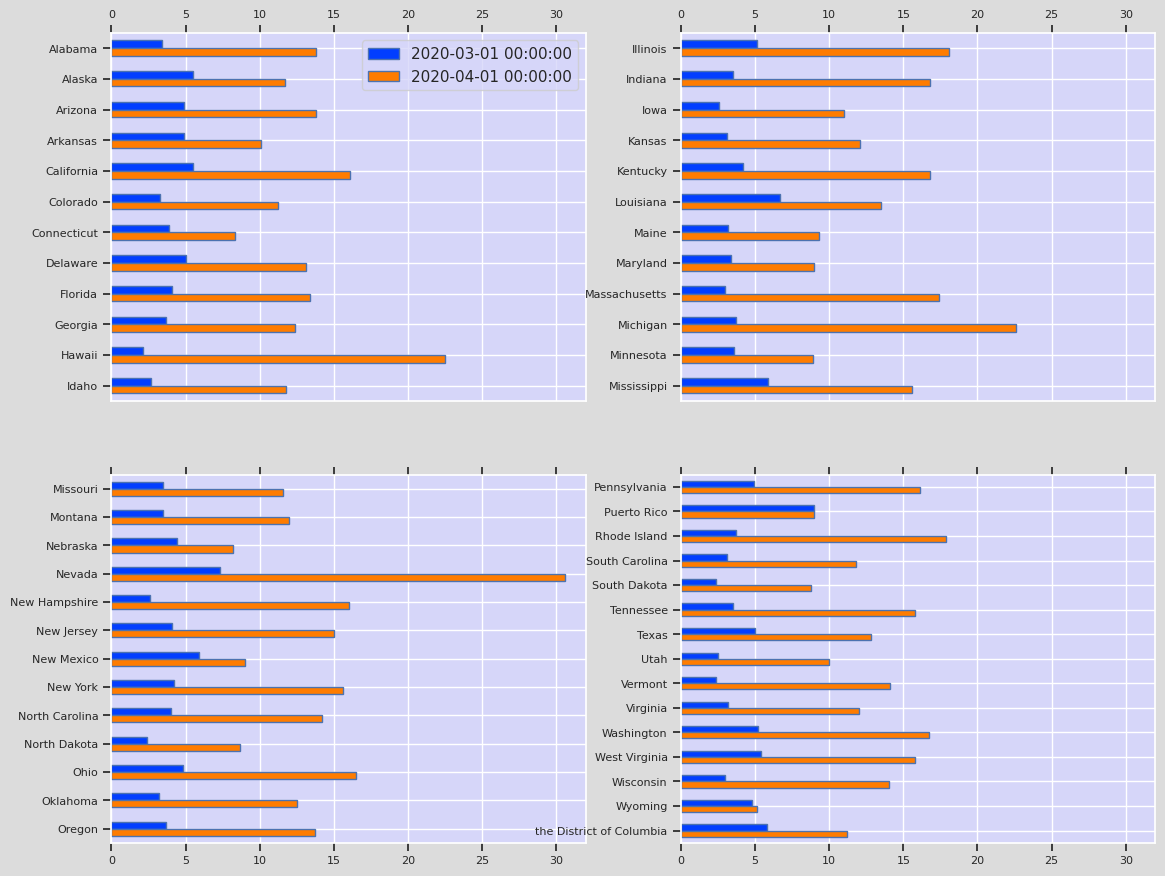

In [202]:

# Plot the four dataframes side by side:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

df1.loc[["2020-03-01", "2020-04-01"]].T.plot(kind="barh", ax=ax[0, 0], fontsize=8)
df2.loc[["2020-03-01", "2020-04-01"]].T.plot(kind="barh", ax=ax[0, 1], fontsize=8)
df3.loc[["2020-03-01", "2020-04-01"]].T.plot(kind="barh", ax=ax[1, 0], fontsize=8)
df4.loc[["2020-03-01", "2020-04-01"]].T.plot(kind="barh", ax=ax[1, 1], fontsize=8)

# change order of bars in all subplots:
ax[0,0].invert_yaxis()
ax[0,1].invert_yaxis()
ax[1,0].invert_yaxis()
ax[1,1].invert_yaxis()

# Remove legend from all but one:
ax[0,1].legend().remove()
ax[1,0].legend().remove()
ax[1,1].legend().remove()

# Keep same scale for all subplots:
ax[0,0].set_xlim(0, 32)
ax[0,1].set_xlim(0, 32)
ax[1,0].set_xlim(0, 32)
ax[1,1].set_xlim(0, 32)

# Set tick labels on the upper side for ax[0,0] and ax[0,1]:
ax[0,0].xaxis.tick_top()
ax[0,1].xaxis.tick_top()

# Make all ticks the same size:
ax[0,0].tick_params(axis="x", labelsize=8)
ax[0,1].tick_params(axis="x", labelsize=8)
ax[1,0].tick_params(axis="x", labelsize=8)
ax[1,1].tick_params(axis="x", labelsize=8)


# Add labels with the % change as seen in dif1, dif2, dif3, dif4.
# Labels should be on the right side of the bars.
# X value of labels should be the same as the April 2020 value.
# Y value of labels should be the same as the state.
# Text should be the % change:

# for i in dif1.index, x in dif1.values:
#     ax[0,0].text(df1.loc["2020-03-01", i], i, str(x) + "%", color='black', va='center')

print(df1.loc["2020-03-01", i])


# for i, v in enumerate(dif1):
    #     ax[0,0].text(v/10, i, str(v) + "%", color='black', va='center')

# for i, v in enumerate(dif2):
#     ax[0,1].text(v + 0.5, i, str(v) + "%", color='black', va='center')

# for i, v in enumerate(dif3):
#     ax[1,0].text(v + 0.5, i, str(v) + "%", color='black', va='center')

# for i, v in enumerate(dif4):
#     ax[1,1].text(v + 0.5, i, str(v) + "%", color='black', va='center')





# Change legend to month names in ax 1:
ax[0,0].legend(["March 2020", "April 2020"], loc="upper right")



fig.tight_layout()

# set title for the whole figure
fig.suptitle("Unemployment Rate by State, (March and April 2020)", x=0.5, y=1.04)

plt.show()


como cambio el desempleo entre marzo y abril
rate de desempleo de abril - marzo


In [109]:
# # plot df1 and df2 side by side on plotly
# fig4 = px.bar(df1.loc[["2020-03-01", "2020-04-01"]].T, barmode="group", title="Unemployment Rate by State, March and April 2020 (1st half)")
# fig5 = px.bar(df2.loc[["2020-03-01", "2020-04-01"]].T, barmode="group", title="Unemployment Rate by State, March and April 2020 (2nd half)")

# fig4.show()
# fig5.show()


<AxesSubplot:>

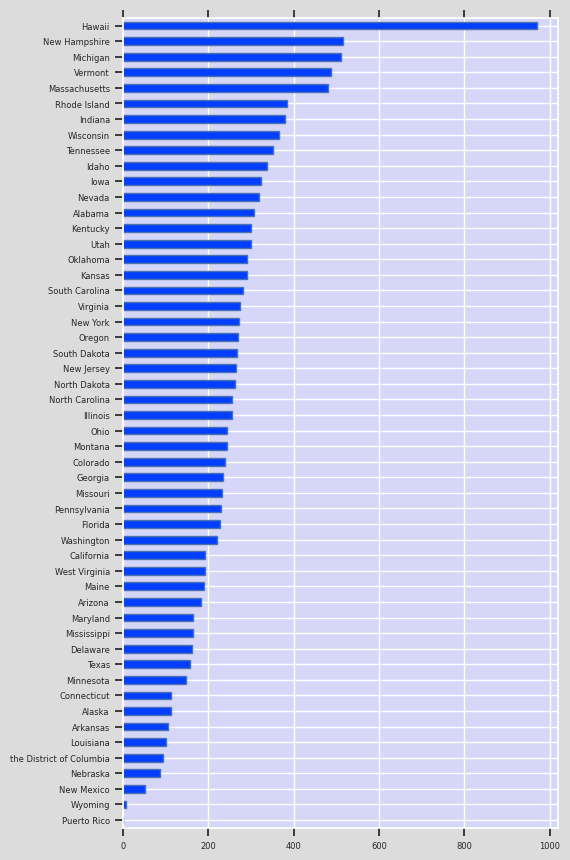

In [107]:
dif = (df.loc['2020-04-01'] - df.loc['2020-03-01'])/df.loc['2020-03-01']*100
dif.sort_values(inplace=True)

dif.plot(kind="barh", figsize=(5,10), fontsize=6)

# dif_df = pd.DataFrame(difference)
# dif_df

# dif_df.plot(kind="barh", figsize=(5,10), fontsize=6)
# plt.title("xxx", x=0.5, y=1.015)
# # take out legend:
# plt.gca().get_legend().remove()
# plt.show()


PASAR ESTO ULTIMO A VARIACION EXPRESADA EN PORCENTAJE
PULIR TODO EL NOTEBOOK